# Income prediction

Recall that we have done a homework of data exploration on 'income.csv' to master the knowledge of Exploratory Data Analysis. In this homework, you are required to predict whether a person's income is high or low according to his relevant information including his age, education, occupation, race and so on. 


The attribute information is:

- **income**: the label of this dataset, belongs to \[high, low\] 
- **age**: the age of a person, a continuous variable.
- **work_class**: work class, belongs to \[Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked\].
- **education**: belongs to \[Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool\].
- **education_degree**: the education level of a person, an ordinal number variable.
- **marital_status**: marital status, belongs to \[Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse\]. 
- **job**: occupation, belongs to \[Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces\]. 
- **relationship**: belongs to \[Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried\].
- **race**: belongs to \[White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black\]. 
- **sex**: belongs to \[Female, Male\]. 
- **capital_gain**: capital gain, a continuous variable. 
- **capital_loss**: capital loss, a continuous variable. 
- **hours_per_week**: how long a person works every week, a continuous variable. 
- **birthplace**: belongs to \[United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, - Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands\].

Specifically, you are required to **fill the blanks of this notebook** based on your results. In this assignment, you will analyze how different features, models and hyper-parameters influence the performance.

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('income.csv')

## 2. Exploratory Data Analysis

### Take a brief look at the data using `head()`

In [3]:
df.head()

,age,work_class,education,education_degree,marital_status,job,relationship,race,sex,capital_gain,capital_loss,hours_per_week,birthplace,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,low
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,low
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,low
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,low
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,low


### Observe the basic statistical information of continuous attributes

In [4]:
df.describe() # only describe the continuous variables

,age,education_degree,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Count the NaN values

In [5]:
df.isnull().sum()  ### before

age                    0
work_class          1836
education              0
education_degree       0
marital_status         0
job                 1843
relationship           0
race                   0
sex                    0
capital_gain           0
capital_loss           0
hours_per_week         0
birthplace           583
income                 0
dtype: int64

### Remove NaN values due to small proportion to the whole dataset

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()  ### after

age                 0
work_class          0
education           0
education_degree    0
marital_status      0
job                 0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
birthplace          0
income              0
dtype: int64

### Pick out categorical and continuous variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
age                 30162 non-null int64
work_class          30162 non-null object
education           30162 non-null object
education_degree    30162 non-null int64
marital_status      30162 non-null object
job                 30162 non-null object
relationship        30162 non-null object
race                30162 non-null object
sex                 30162 non-null object
capital_gain        30162 non-null int64
capital_loss        30162 non-null int64
hours_per_week      30162 non-null int64
birthplace          30162 non-null object
income              30162 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### Observe categorical attributes

In [9]:
for col in df.select_dtypes([np.object]).columns:
    print('{}: {}\n'.format(col, df[col].unique()))

work_class: ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay']

education: ['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-voc' '1st-4th' '5th-6th' 'Assoc-acdm'
 '12th' '9th' 'Preschool']

marital_status: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

job: ['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Transport-moving' 'Sales' 'Craft-repair'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Handlers-cleaners'
 'Armed-Forces' 'Priv-house-serv']

relationship: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

race: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

sex: ['Female' 'Male']

birthplace: ['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holan

### Merge values of similar semantics

In [10]:

df.education.replace({
    'Preschool': 'dropout',
    '10th': 'dropout',
    '11th': 'dropout',
    '12th': 'dropout',
    '1st-4th': 'dropout',
    '5th-6th': 'dropout',
    '7th-8th': 'dropout',
    '9th': 'dropout',
    'HS-Grad': 'HighGrad',
    'HS-grad': 'HighGrad',
    'Some-colloge': 'CommunityCollege',
    'Assoc-acdm': 'CommunityCollege',
    'Assoc-voc': 'CommunityCollege',
    'Prof-school': 'Masters',
}, inplace=True)

## 3. Classification Models

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics


# tentatively take 3 numerical attributes for convenience
X = df[['education_degree', 'age', 'hours_per_week']].values
Y = df[['income']].values

# train, test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=88, stratify=Y)

### KNN

In [12]:
## Example: Use KNN to predict income
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

# change the shape of Y_train to (n_samples, ) using `.ravel()`
knn.fit(X_train, Y_train.ravel())

knn_pred = knn.predict(X_test)

print('The accuracy of the KNN is', metrics.accuracy_score(knn_pred, Y_test))

The accuracy of the KNN is 0.7892584816001769


### Hyper-parameter tuning with `GridSearchCV()`

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(30, 70)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# change the shape of Y_train to (n_samples, ) using `.ravel()`
knn_cv.fit(X_train, Y_train.ravel())

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 66}
0.7899872116705348


### Your Tasks

As far as you can see, we have built a KNN classification model and select the best hyper-parameters with `GridSearchCV()`. In this task, you are asked to build your own models using `scikit-learn` APIs.

**Question 1 [10pts]**. Build a `Logistic Regression` model on training data and calculate accuracy over testing data.

**Question 2 [10pts]**. Build a `Decision Tree` model on training data and calculate accuracy over testing data. 

**Question 3 [20pts]**. Use graphviz to visualize the decision tree of Question 2, and use a proper tool to visualize the decision boundary of the decision tree.

**Question 4 [10pts]**. Build a `Random Forest` model with your customized parameters on training data and calculate accuracy over testing data.

**Question 5 [20pts]**. For `Random Forest`, use `GridSearchCV()` to find the **optimal** hyper-parameter combination over: 
    - `n_estimator`: the number of trees in the forest
    - `max_depth`: the maximum depth of the tree
    - `max_leaf_nodes`: grow trees with ``max_leaf_nodes`` in best-first fashion.
    
   You should specify your own sets of values for these hyper-parameters. What's more, you are required to print the importance of each features of the dataset.
   
   (*tip: using the `feature_importances_` attributes of the `RandomForestClassifier()` as we have learned in class*)

**Question 6 [10pts]**. Build a `AdaBoost` model on training data and calculate accuracy over testing data.

In [14]:
# Question 1: Build a `Logistic Regression` model on training data and calculate accuracy over testing data.
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression().fit(X_train, Y_train.ravel())
print("Logistic Regression model's training set score:{:.6f}".format(logreg.score(X_train,Y_train.ravel())))
print("Logistic Regression model's test set score:{:.6f}".format(logreg.score(X_test,Y_test.ravel())))

d:\软件\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression model's training set score:0.782267
Logistic Regression model's test set score:0.787490


In [15]:
# Question 2: Build a `Decision Tree` model on training data and calculate accuracy over testing data.
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(random_state=2016010215)
dec_tree.fit(X_train, Y_train.ravel())
print("Decision Tree's training set score:{:.6f}".format(dec_tree.score(X_train,Y_train.ravel())))
print("Decision Tree's test set score:{:.6f}".format(dec_tree.score(X_test,Y_test.ravel())))

Decision Tree's training set score:0.843793
Decision Tree's test set score:0.764615


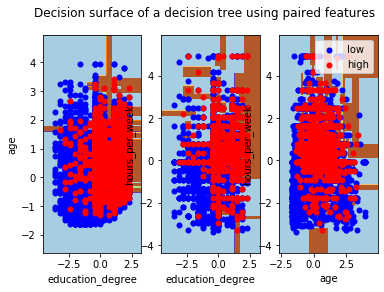

In [58]:
# Question 3: Use graphviz to visualize the decision tree of Question 2, and use a proper tool to visualize the decision boundary of the decision tree.
import graphviz
import pydotplus
dot_data=tree.export_graphviz(dec_tree,out_file=None,feature_names=['education_degree','age','hours_per_week'],class_names=['high','low'],filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph.render("tree")
#此处在根目录中生成tree.pdf文件，我运行生成的文件附在压缩包中

# Parameters
n_classes = 2
plot_colors = "br"
plot_step = 0.02
feature_names=['education_degree', 'age', 'hours_per_week']
target_names=['low','high']
for pairidx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):
    X = X_test[:, pair]
    Y = Y_test.flatten()
    for index, value in enumerate(Y):
        if Y[index] == 'low' : Y[index]=0
        else : Y[index] = 1
    Y = Y.astype(float)
            
    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(10)
    np.random.shuffle(idx)
    X = X[idx]
    Y = Y[idx]
    
    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std
    
    clf = DecisionTreeClassifier().fit(X, Y)

    # Plot the decision boundary
    plt.subplot(1, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    plt.axis("tight")
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],linewidths=0.01,cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


In [18]:
# Question 4: Build a `Random Forest` model with your customized parameters on training data and calculate accuracy over testing data.
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200,criterion="gini",max_depth=4,random_state=2016010215,max_features=3)
clf.fit(X_train, Y_train.ravel())
print("Random Forest's training set score:{:.6f}". format(clf.score(X_train,Y_train.ravel())))
print("Random Forest's test set score:{:.6f}". format(clf.score(X_test,Y_test.ravel())))

Random Forest's training set score:0.795908
Random Forest's test set score:0.796442


{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 1, 'n_estimators': 300}
Accuracy on training set:0.843793
Accuracy on test set:0.776218


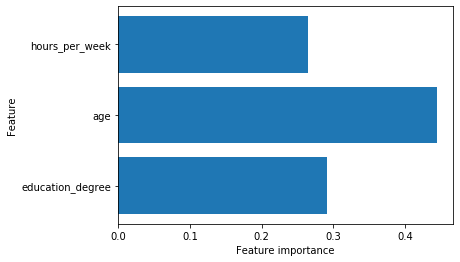

In [19]:
# Question 5: Hyper-parameter search over Random Forest and print feature importance list.
from sklearn.model_selection import GridSearchCV
param_grid = { "n_estimators"      : [100, 300],
           "criterion"         : ["gini", "entropy"],
           "max_features"      : [1, 3],
           "max_depth"         : [1, 20],
           "bootstrap": [True, False]}
grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=2)
grid_search.fit(X_train,Y_train.ravel())
print (grid_search.best_params_)
# 根据调优出的参数对clf重新赋参
clf=RandomForestClassifier(n_estimators=300,criterion="gini",max_depth=20,random_state=2016010215,max_features=1)
clf.fit(X_train, Y_train.ravel())
print("Accuracy on training set:{:.6f}". format(clf.score(X_train,Y_train.ravel())))
print("Accuracy on test set:{:.6f}". format(clf.score(X_test,Y_test.ravel())))
# 画出特征重要性柱形图
def plot_feature_importances(model):
    n_features=3
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['education_degree','age','hours_per_week'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(clf)

In [20]:
# Question 6: Build a `AdaBoost` model on training data and calculate accuracy over testing data.
from sklearn.ensemble import AdaBoostClassifier
abclf=AdaBoostClassifier(n_estimators=300,learning_rate=1.0,random_state=2016010215)
abclf.fit(X_train, Y_train.ravel())
print("AdaBoost's training set score:{:.6f}". format(abclf.score(X_train,Y_train.ravel())))
print("AdaBoost's test set score:{:.6f}". format(abclf.score(X_test,Y_test.ravel())))

AdaBoost's training set score:0.794345
AdaBoost's test set score:0.796994


## 4. Feature Engineering

Before you start this part, we recommend you to read this [article](https://www.cnblogs.com/jasonfreak/p/5448385.html)

### Using `LabelEncoder()`: map categorical features to [0, C)

In [21]:

from sklearn.preprocessing import LabelEncoder
encoded_df = df.apply(LabelEncoder().fit_transform)
eX = encoded_df[['work_class','education','marital_status','job','relationship','race','sex','capital_gain','capital_loss','education_degree','age', 'hours_per_week','birthplace']].values
eY = encoded_df[['income']].values
eX_train, eX_test, eY_train, eY_test = train_test_split(eX, eY, test_size=0.3, random_state=88, stratify=eY)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
elogreg=LogisticRegression().fit(eX_train, eY_train.ravel())
print("Logistic Regression model's training set score:{:.6f}".format(elogreg.score(eX_train,eY_train.ravel())))
print("Logistic Regression model's test set score:{:.6f}".format(elogreg.score(eX_test,eY_test.ravel())))

#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
edec_tree=DecisionTreeClassifier(random_state=2016010215)
edec_tree.fit(eX_train, eY_train.ravel())
print("Decision Tree's training set score:{:.6f}".format(edec_tree.score(eX_train,eY_train.ravel())))
print("Decision Tree's test set score:{:.6f}".format(edec_tree.score(eX_test,eY_test.ravel())))

#Random Tree
from sklearn.ensemble import RandomForestClassifier
eclf=RandomForestClassifier(n_estimators=300,criterion="gini",max_depth=4,random_state=2016010215,max_features=10)
eclf.fit(eX_train, eY_train.ravel())
print("Random Forest's training set score:{:.6f}". format(eclf.score(eX_train,eY_train.ravel())))
print("Random Forest's test set score:{:.6f}". format(eclf.score(eX_test,eY_test.ravel())))

#Adaboost
from sklearn.ensemble import AdaBoostClassifier
e_abclf=AdaBoostClassifier(n_estimators=300,learning_rate=1.0,random_state=2016010215)
e_abclf.fit(eX_train, eY_train.ravel())
print("AdaBoost's training set score:{:.6f}". format(e_abclf.score(eX_train,eY_train.ravel())))
print("AdaBoost's test set score:{:.6f}". format(e_abclf.score(eX_test,eY_test.ravel())))

d:\软件\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression model's training set score:0.818358
Logistic Regression model's test set score:0.819870
Decision Tree's training set score:0.978118
Decision Tree's test set score:0.812134
Random Forest's training set score:0.841993
Random Forest's test set score:0.839430
AdaBoost's training set score:0.865865
AdaBoost's test set score:0.864736


### Using `pandas.get_dummies()`: map categorical features into one-hot encoding

In [22]:
cols = list(set(df.select_dtypes([np.object]).columns) - set(['income']))

onehot_df = pd.get_dummies(df, columns=cols)
onehot_df.head()
oX = onehot_df.drop(['income'],axis=1)
oY = onehot_df[['income']].values

oX_train, oX_test, oY_train, oY_test = train_test_split(oX, oY, test_size=0.3, random_state=88, stratify=oY)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
ologreg=LogisticRegression().fit(oX_train, oY_train.ravel())
print("Logistic Regression model's training set score:{:.6f}".format(ologreg.score(oX_train,oY_train.ravel())))
print("Logistic Regression model's test set score:{:.6f}".format(ologreg.score(oX_test,oY_test.ravel())))

#Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
odec_tree=DecisionTreeClassifier(random_state=2016010215)
odec_tree.fit(oX_train, oY_train.ravel())
print("Decision Tree's training set score:{:.6f}".format(odec_tree.score(oX_train,oY_train.ravel())))
print("Decision Tree's test set score:{:.6f}".format(odec_tree.score(oX_test,oY_test.ravel())))

#Random Tree
from sklearn.ensemble import RandomForestClassifier
oclf=RandomForestClassifier(n_estimators=300,criterion="gini",max_depth=4,random_state=2016010215,max_features=10)
oclf.fit(oX_train, oY_train.ravel())
print("Random Forest's training set score:{:.6f}". format(oclf.score(oX_train,oY_train.ravel())))
print("Random Forest's test set score:{:.6f}". format(oclf.score(oX_test,oY_test.ravel())))

#Adaboost
from sklearn.ensemble import AdaBoostClassifier
o_abclf=AdaBoostClassifier(n_estimators=300,learning_rate=1.0,random_state=2016010215)
o_abclf.fit(oX_train, oY_train.ravel())
print("AdaBoost's training set score:{:.6f}". format(o_abclf.score(oX_train,oY_train.ravel())))
print("AdaBoost's test set score:{:.6f}". format(o_abclf.score(oX_test,oY_test.ravel())))

d:\软件\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression model's training set score:0.847629
Logistic Regression model's test set score:0.846723
Decision Tree's training set score:0.978118
Decision Tree's test set score:0.814676
Random Forest's training set score:0.831526
Random Forest's test set score:0.832799
AdaBoost's training set score:0.865107
AdaBoost's test set score:0.866947


The aforementioned machine learning models are built upon **3 distinct attributes** (`education_degree`, `age` and `hours_per_week`) with **10 more attributes unused**. You are required to utilize those unused columns using the feature engineering methods introduced above to address this issue.]

**Question 7  [20pts]**. Compare the performance (accuracy) of different algorithms and different preprocessing methods on the dataset. Specifically, please fill the blanks in the table below:

|         Alg.        | Original 3 columns | All columns with `LabelEncoder` | All columns with `OneHot` |
|        :---:        |        :----:      |             :----:              |           :----:          |
| Logistic Regression |    0.787490(0.782267)      |       0.819870(0.818358)        |       0.846723(0.847629)        |
| Decision Tree      |     0.764615(0.843793)       |       0.812134(0.978118)        |       0.812908(0.978118)     |
| Random Forest       |     0.794673(0.792924)       |        0.839430(0.841993)        |       0.831252(0.829773) |  
| AdaBoost      |     0.796994(0.794345)       |            0.864736(0.865865)             |         0.866947(0.865107)          |

In [23]:
# Question 7: Compare the performance (accuracy) of different algorithms and different preprocessing methods on the dataset
## 上表中表内未加括号为测试数据的准确度，加括号为训练数据的准确度
## 从表中数据对比可看出：应用LabelEncoder和OneHot对数据中十个特征变量进行处理并应用该十三个特征进行模型训练相比于仅应用三个特征进行模型训练
## 均可提高模型的准确度（无论是测试数据集还是训练数据集）
## 其中对于线性回归模型，OneHot对于模型准确度的提升更为显著
## 对于其余三个模型，二者对于模型准确度的提升相差无几
## 其中值得注意的是，对于决策树模型应用十三个模型进行模拟后可以极大地提升模型在训练数据集上的准确度（至0.978118）
## 但决策树模型在测试数据集上地准确度在四个模型中最低